
This project is to evaluate player position using different metrics.First I have used some visualizations and then logistic regression models.

Lets first import relevant libraries and the dataset.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/shanksghub/FootballStats/master/FootballStats.csv'
df1 = pd.read_csv(url)

**Fill NA/NaN values

In [5]:
df1 = df1.drop(["name"], axis=1)
df1 = df1.dropna(axis = 0, how ='any') 
df1.fillna(0)

df1.head()

,position,appearances,goals,tackles,passes,assists,shots,hit woordwork,crosses,blocks,clearances,headed clearances,clean sheets,saves,punches,goals conceded,yellow cards,red cards,fouls,offsides
0,Forward,23,17,16,538.0,6,84,5,7,20,3,0,0,0,0,3,0.0,15.0,18.0,0.0
1,Defender,27,2,30,2313.0,1,0,0,6,69,12,0,0,0,3,0,19.0,2.0,0.0,0.0
2,Forward,26,17,13,739.0,7,87,1,49,21,4,1,0,0,0,0,0.0,0.0,20.0,21.0
3,Forward,25,15,19,518.0,4,63,3,26,13,15,4,0,0,0,0,0.0,0.0,11.0,17.0
4,Forward,22,14,7,446.0,4,77,1,9,18,11,9,0,0,0,0,4.0,0.0,23.0,7.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 45
Data columns (total 20 columns):
position             23 non-null object
appearances          23 non-null int64
goals                23 non-null int64
tackles              23 non-null int64
passes               23 non-null float64
assists              23 non-null int64
shots                23 non-null int64
hit woordwork        23 non-null int64
crosses              23 non-null int64
blocks               23 non-null int64
clearances           23 non-null int64
headed clearances    23 non-null int64
clean sheets         23 non-null int64
saves                23 non-null int64
punches              23 non-null int64
goals conceded       23 non-null int64
yellow cards         23 non-null float64
red cards            23 non-null float64
fouls                23 non-null float64
offsides             23 non-null float64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.8+ KB


In [7]:
df1.describe()

,appearances,goals,tackles,passes,assists,shots,hit woordwork,crosses,blocks,clearances,headed clearances,clean sheets,saves,punches,goals conceded,yellow cards,red cards,fouls,offsides
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,24.913043,5.521739,25.173913,935.652174,2.260870,27.478261,0.956522,25.347826,11.304348,51.086957,27.130435,2.391304,10.043478,1.434783,15.695652,3.521739,0.869565,18.130435,4.826087
std,1.806882,5.976238,19.389904,449.932784,2.649484,35.089327,1.296087,45.195141,15.342854,64.231055,34.577061,4.469484,22.921761,3.130874,19.848139,3.998518,3.123290,12.447360,7.761514
min,20.000000,0.000000,0.000000,446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,8.000000,560.000000,0.000000,0.000000,0.000000,1.000000,0.500000,4.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,10.500000,0.000000
50%,25.000000,3.000000,28.000000,748.000000,1.000000,0.000000,1.000000,9.000000,7.000000,15.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,19.000000,1.000000
75%,26.000000,10.000000,38.500000,1204.500000,3.500000,59.500000,1.000000,25.000000,19.000000,89.500000,48.000000,2.500000,0.000000,0.000000,32.000000,5.000000,0.000000,28.000000,6.000000
max,27.000000,17.000000,69.000000,2313.000000,10.000000,93.000000,5.000000,197.000000,69.000000,175.000000,95.000000,14.000000,77.000000,12.000000,55.000000,19.000000,15.000000,40.000000,28.000000


Text(0.5, 0, 'goals')

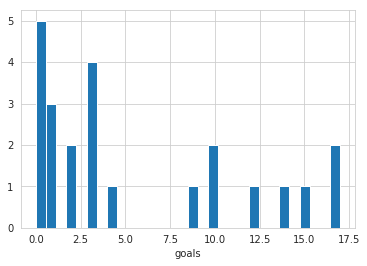

In [8]:
sns.set_style('whitegrid')
df1['goals'].hist(bins=30)
plt.xlabel('goals')

Jointplot of Shots and goals..


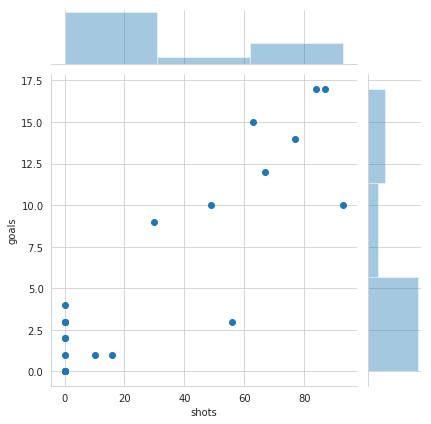

In [9]:
sns.jointplot(x='shots',y='goals',data=df1)

Density Joint plot of passes and goals.

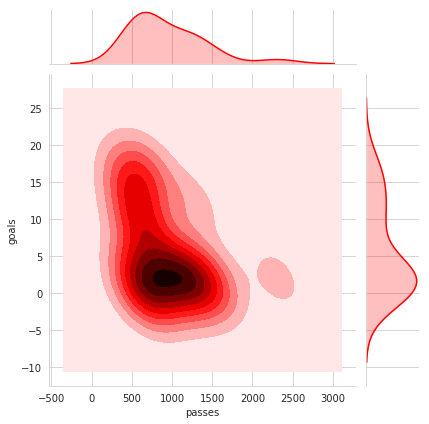

In [10]:
sns.jointplot(x='passes',y='goals',data=df1,color='red',kind='kde');

JointPlot of tackles and goals.

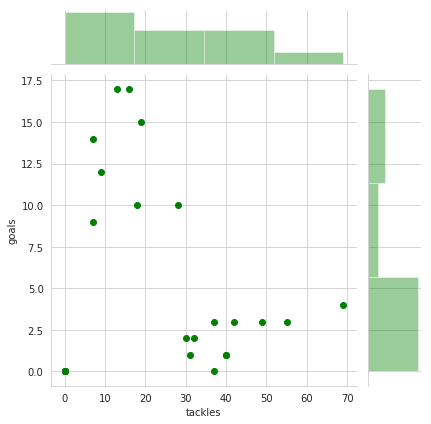

In [11]:
sns.jointplot(x='tackles',y='goals',data=df1,color='green')

Logistic Regression of Position and various features.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df1[['passes', 'shots', 'tackles','assists', 'crosses']]
y = df1['position']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Defender       1.00      0.75      0.86         4
     Forward       1.00      1.00      1.00         2
  Goalkeeper       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.89      0.92      0.89         8
weighted avg       0.92      0.88      0.88         8



Logistic Regression of Position and various features.

In [20]:
from sklearn.model_selection import train_test_split

X = df1[['blocks','clearances','headed clearances']]
y = df1['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Defender       1.00      0.75      0.86         4
     Forward       0.67      1.00      0.80         2
  Goalkeeper       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.89      0.92      0.89         8
weighted avg       0.92      0.88      0.88         8



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
